<a href="https://colab.research.google.com/github/oh-young-min/ML_CNN/blob/main/MachineLearningCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **이미지 다운로드 및 경로 출력**

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("larserikrisholm/dinosaur-image-dataset-15-species")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dinosaur-image-dataset-15-species


# **이미지 정규화 및 데이터셋 분리**

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/kaggle/input/dinosaur-image-dataset-15-species/dinosaur_dataset"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1964 images belonging to 15 classes.
Found 484 images belonging to 15 classes.


# **훈련 데이터셋 50개 출력**

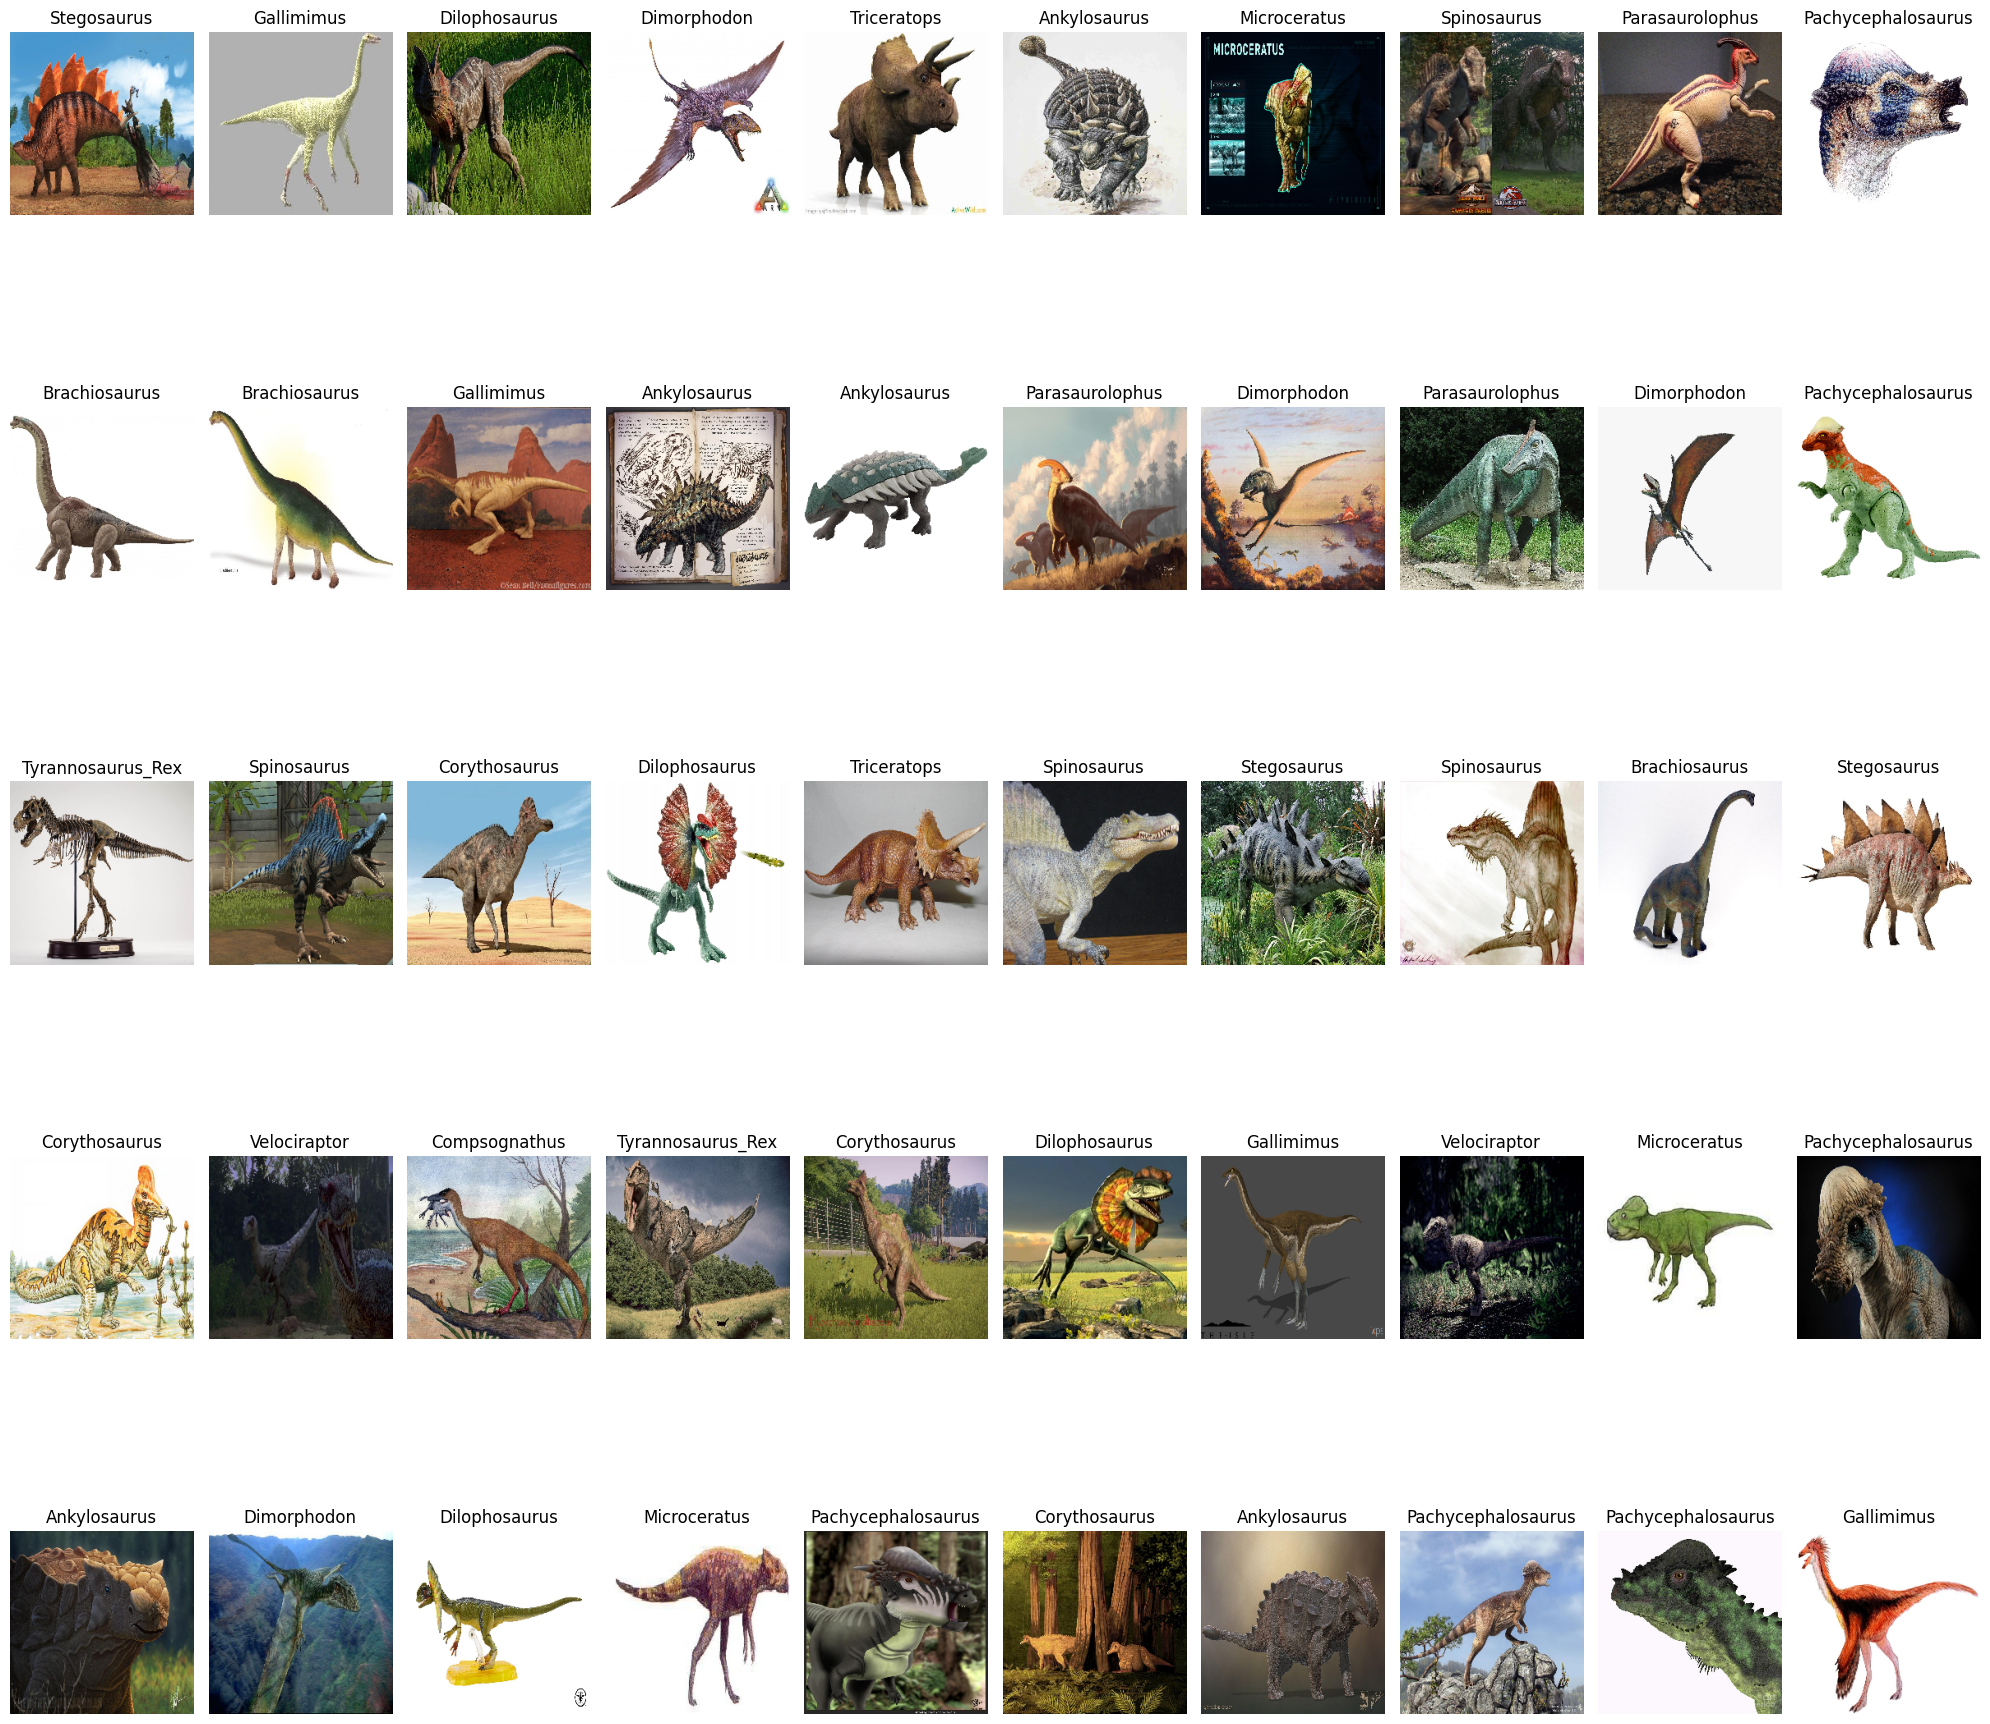

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 클래스 이름 가져오기
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

# 이미지를 저장할 리스트 초기화
all_images = []
all_labels = []

# 50개의 이미지를 모을 때까지 배치 가져오기
while len(all_images) < 50:
    images, labels = next(train_generator)
    all_images.extend(images)
    all_labels.extend(labels)

# 처음 50개의 이미지와 레이블 선택
images_to_display = all_images[:50]
labels_to_display = all_labels[:50]


# 이미지 50개 출력
plt.figure(figsize=(20, 20)) # Adjusted figure size for more images
for i in range(50): # Loop for 50 images
    plt.subplot(5, 10, i+1) # Changed grid to 5 rows and 10 columns
    plt.imshow(images_to_display[i])
    plt.title(class_names[np.argmax(labels_to_display[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

# **InceptionV3 기반 CNN 모델 구성** **굵은 텍스트**

In [7]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 기본 InceptionV3 모델 (사전 학습된 가중치 사용, 최상위 분류기 제외)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# feature extractor로만 사용 (학습하지 않도록 설정)
base_model.trainable = False

# 새로운 분류기 붙이기
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(15, activation='softmax')(x)  # 클래스 수: 15

# 전체 모델 정의
model = Model(inputs=base_model.input, outputs=outputs)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 보기
model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,331,183 (85.19 MB)

 Trainable params: 528,399 (2.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)